In [83]:
# Import libraries
import pandas as pd


pd.set_option('display.max_rows', 8)
pd.set_option('display.max_columns',10)

# Let's ignore warnings
# Some operations might raise a warning and we want to ignore them
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# this command initializes Plotly in Jupyter Notebook 
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


In [84]:
# Use Pandas to read financial data in "financial.csv" file 
df = pd.read_csv('financial_data.csv')

In [ ]:
# Dataframe preview
df.head()

In [86]:
# Let's display column names
df.columns.tolist()[0:5]

['Company Name', 'Sector', 'Industry', 'Ticker', 'Report Date']

In [87]:
# Let's view the number of unique stock ticker symbols available in the Pandas DataFrame
df['Ticker'].nunique()

8

In [88]:
# Let's view the names of unique stock ticker symbols available in the Pandas DataFrame
df['Ticker'].unique()

array(['AAPL', 'UNH', 'NVDA', 'XOM', 'GE', 'COST', 'JCI', 'ICE'],
      dtype=object)

In [89]:
# Let's display a statistical summary of the Pandas DataFrame
df.describe()

,Fiscal Year,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,...,Net Debt / EBIT change from last 2 quarters,Net Debt / EBIT change from last 3 quarters,Net Debt / EBIT change from last 4 quarters,% Change in Quarterly EPS (Target Output),% Change in Quarterly Revenue (Target Output)
count,462.000000,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,...,462.000000,462.000000,462.000000,462.000000,462.000000
mean,2013.852814,6.173465e+09,6.304594e+09,3.123002e+10,-2.135202e+10,...,-0.483950,-1.399524,-5.157874,-0.125685,0.076297
std,5.546880,8.446961e+09,8.615448e+09,3.147591e+10,2.069104e+10,...,11.742890,28.410417,107.832160,8.175602,0.641026
min,2001.000000,4.011000e+08,4.077850e+08,1.736410e+08,-8.676100e+10,...,-245.494624,-603.440860,-2316.720430,-156.534702,-0.844352
25%,2010.000000,9.502500e+08,9.652500e+08,3.216000e+09,-3.498300e+10,...,-0.456880,-0.564846,-0.594653,-0.168693,-0.033873
50%,2015.000000,1.342000e+09,1.396000e+09,2.476900e+10,-1.784500e+10,...,-0.098420,-0.137558,-0.127419,0.061085,0.022917
75%,2018.000000,5.176250e+09,5.242079e+09,4.842600e+10,-1.622250e+09,...,0.247636,0.268106,0.380893,0.343166,0.087536
max,2022.000000,2.630964e+10,2.654677e+10,1.380000e+11,-1.928750e+08,...,33.050690,72.227474,22.765332,47.973297,11.461413


# PERFORM DATA VISUALIZATION

In [90]:
apple_df = df[df['Ticker'] == 'AAPL'].reset_index(drop=True)

In [91]:
# Let's Drop the "% Change in EPS (Target Output)" column since we want to proedict the '% Change in Quarterly Revenue'

apple_df = apple_df.drop(columns = '% Change in Quarterly EPS (Target Output)')

In [92]:
# Let's plot the histogram for the target column (output) for Apple
fig = px.histogram(apple_df['% Change in Quarterly Revenue (Target Output)'] * 100, nbins = 30)
fig.update_layout({'plot_bgcolor': "white"})

In [ ]:
apple_df.info()

In [94]:
# Select only numeric columns (int or float)
numeric_columns = apple_df.select_dtypes(include=['int', 'float']).columns

# Create a new DataFrame with only numeric columns
numeric_df = apple_df[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# IF YOU WANT TO: Print or use the correlation matrix as needed
# print(correlation_matrix)


In [ ]:
# Let's view correlation coefficients for every feature with the target output 
correlation_matrix[['% Change in Quarterly Revenue (Target Output)']]

In [96]:
# Let's sort the correlation values in a descending order
# Let's display the top 10 positively correlated features with the output (target column)
top_positive_corr = correlation_matrix[['% Change in Quarterly Revenue (Target Output)']].sort_values( '% Change in Quarterly Revenue (Target Output)', ascending = False)[:10]

In [97]:
# Let's obtain the top 10 negatively correlated features with the output (target column)
top_negative_corr = correlation_matrix[['% Change in Quarterly Revenue (Target Output)']].sort_values('% Change in Quarterly Revenue (Target Output)')[:10]

In [98]:
# Let's display the top positively and negatively correlated features with the output 
apple_df[top_negative_corr.reset_index()['index'].tolist() + top_positive_corr.reset_index()['index'].tolist()].head()

,Sales Per Share change from last 3 quarters,Revenue change from last 3 quarters,Sales Per Share change from last 2 quarters,Revenue change from last 2 quarters,Gross Profit Margin change from last quarter,...,Net Debt / EBIT change from last 3 quarters,Liabilities to Equity Ratio change from last 2 quarters,Net Cash from Investing Activities,Cost of Revenue,Total Assets change from last quarter
0,-0.211262,-0.211230,0.464663,0.464747,0.093666,...,1.093373,0.070228,10000000,-1041000000,-0.009625
1,0.439904,0.439921,0.013365,0.013277,0.024266,...,-8.924526,-0.162429,-104000000,-1013000000,-0.008236
2,-0.039080,-0.039133,-0.067783,-0.067797,0.018349,...,-1.423517,-0.052283,-417000000,-953000000,0.016775
3,0.013458,0.013559,0.030885,0.031034,-0.108599,...,0.537298,0.045842,-825000000,-1086000000,0.023195
4,-0.014524,-0.014483,0.039261,0.039273,0.000146,...,3.047505,0.007524,82000000,-1038000000,0.004630


In [99]:
# Let's re-calculate the correlation matrix to only calculate the top 10 positively and negatively correlated features 
correlation_matrix = apple_df[top_negative_corr.reset_index()['index'].tolist() + 
                              top_positive_corr.reset_index()['index'].tolist()].corr()

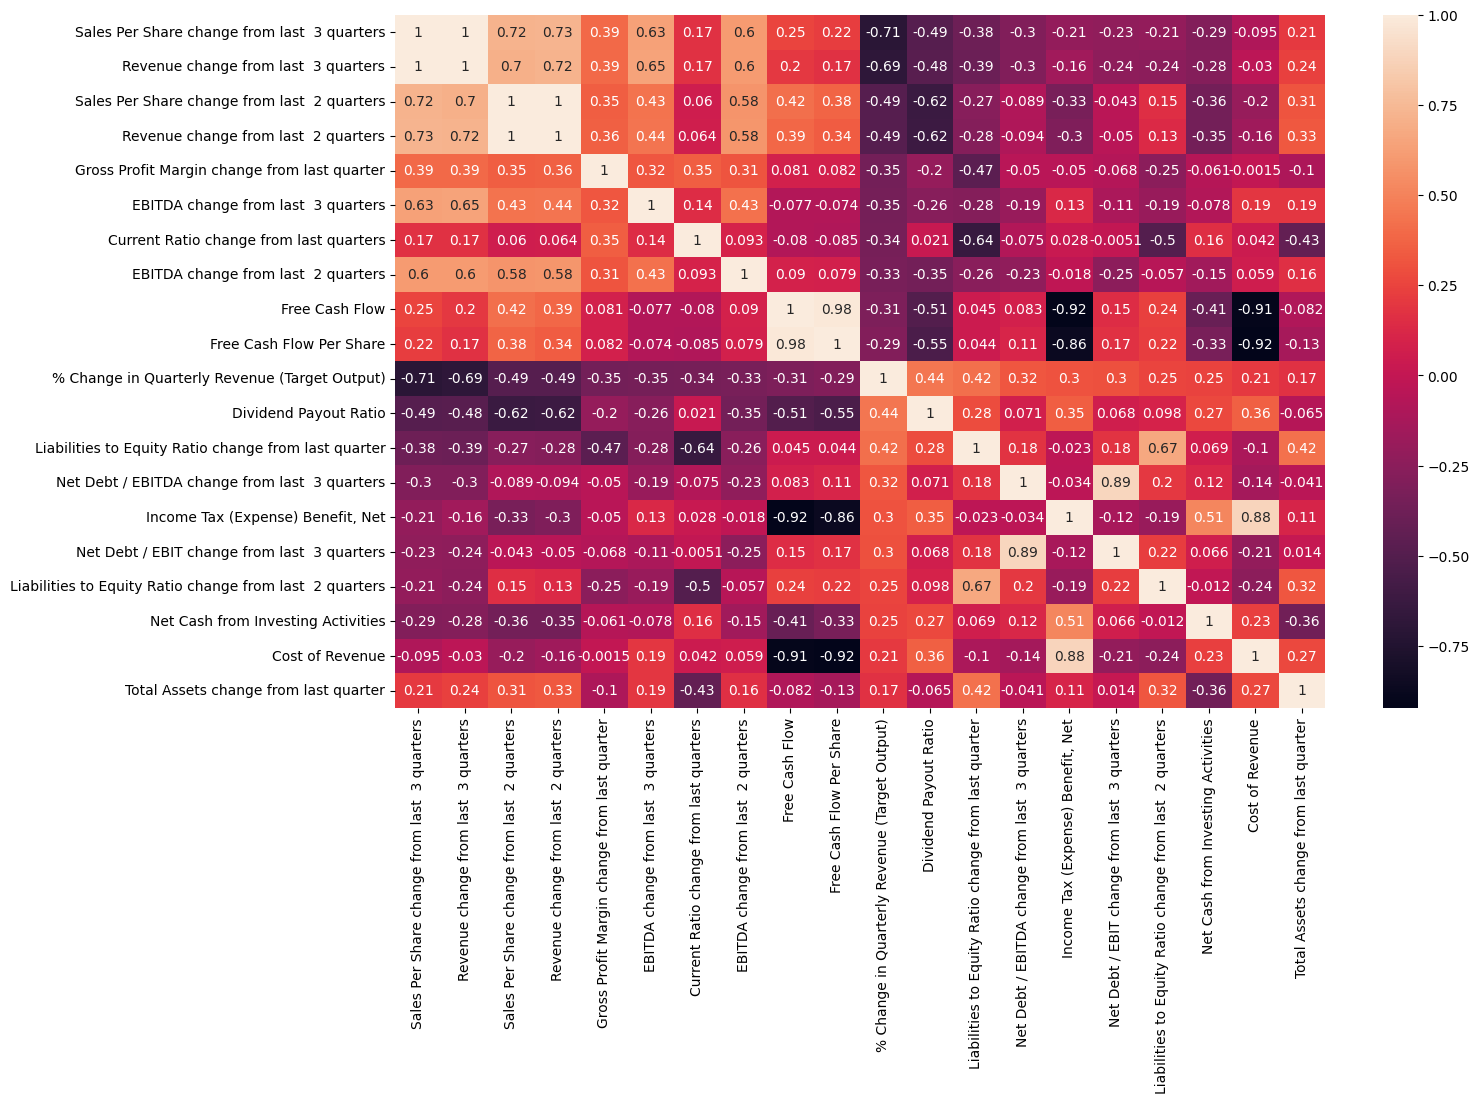

In [100]:
# Let's use Seaborn to display a heatmap for the correlation matrix
f, ax = plt.subplots(figsize = (15, 9))
sns.heatmap(correlation_matrix, annot = True);

# PERFORM ONE-HOT ENCODING

In [ ]:
# Let's display Pandas DataFrame information
# Note that "Publish Date" column is listed as object data type
apple_df.info(200)

In [102]:
# Let's convert "Publish Date" column to datetime
# Python has a module dedicated to deal with date and time data known as datetime
apple_df['Publish Date'] = pd.to_datetime(apple_df['Publish Date'])

In [ ]:
# Let's display the Pandas DataFrame information
apple_df.info(200)

In [104]:
# Sorting the DataFrame in an ascending order based on the "Publish Date" column 
apple_df.sort_values(by = 'Publish Date', ascending = True, inplace = True)

In [105]:
# Let's drop the following columns from the Pandas DataFrame
cols_to_drop = ['Ticker','Sector', 'Industry','Company Name', 'Report Date', 'Currency',
                'Fiscal Year', 'Publish Date', 'Restated Date']

apple_df = apple_df.drop(columns = cols_to_drop)

In [106]:
# Let's perform one-hot encoding to the "Fiscal Period" column

# Let's display the one-hot encoded version of the "Fiscal Period" column
fiscal_encoded = pd.get_dummies(apple_df['Fiscal Period'])
fiscal_encoded

,Q1,Q2,Q3,Q4
0,False,False,True,False
1,False,False,False,True
2,True,False,False,False
3,False,True,False,False
...,...,...,...,...
81,False,False,False,True
82,True,False,False,False
83,False,True,False,False
84,False,False,True,False


In [107]:
# Drop the 'Fiscal Period' column from the Pandas DataFrame
apple_df = apple_df.drop('Fiscal Period', axis = 1)

# Concatenate the original DataFrame and the one-hot encoded "Fiscal Period" column
apple_df = pd.concat([apple_df, fiscal_encoded], axis = 1)
apple_df

,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,...,% Change in Quarterly Revenue (Target Output),Q1,Q2,Q3,Q4
0,24208660000,24900176000,1.475000e+09,-1041000000,434000000,...,-0.016949,False,False,True,False
1,24208660000,24900176000,1.450000e+09,-1013000000,437000000,...,-0.051724,False,False,False,True
2,24208660000,24900176000,1.375000e+09,-953000000,422000000,...,0.087273,True,False,False,False
3,24208660000,24900176000,1.495000e+09,-1086000000,409000000,...,-0.044147,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
81,16391724000,16519291000,8.336000e+10,-48186000000,35174000000,...,0.486864,False,False,False,True
82,16391724000,16519291000,1.240000e+11,-69702000000,54243000000,...,-0.215152,True,False,False,False
83,16391724000,16519291000,9.727800e+10,-54719000000,42559000000,...,-0.147197,False,True,False,False
84,16162945000,16262203000,8.295900e+10,-47074000000,35885000000,...,0.086633,False,False,True,False


# SPLIT THE DATA INTO TRAINING AND TESTING

In [108]:
# Split the data into inputs "X" and outputs "y"
X = apple_df.drop('% Change in Quarterly Revenue (Target Output)', axis = 1)
y = apple_df['% Change in Quarterly Revenue (Target Output)']

In [111]:
# Let's perform data train/test split
# Shuffling means randomly reordering the elements in the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)

In [112]:
# Check out the shape of input data after train/test split operation 
print(X_train.shape, X_test.shape)

(59, 194) (26, 194)


In [113]:
# Check out the shape of output data after train/test split operation 
print(y_train.shape, y_test.shape)

(59,) (26,)


# TRAIN AND EVALUATE A LINEAR REGRESSION MODEL

In [115]:
# Import linear_model from Scikit-Learn Library 
from sklearn import linear_model

# Train a linear regression model using Scikit-Learn Library
# First we instantiate an object out of our linear_model class
# Then we apply the fit() method to fit the model to the training dataset (X_train, y_trian)
linear_regression_model = linear_model.LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [116]:
# After the regression model is trained, we evaluate its performance on the testing dataset
# Note that the testing dataset has never been seen by the model during training
# Now we can compare y_predict vs. the actual output y_test (ground truth data)
y_predict = linear_regression_model.predict(X_test)

In [117]:
# Let's generate various regression metrics by comparing "y_predict" to actual outputs "y_test" (ground truth data)
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np 

RMSE = float(np.sqrt(mean_squared_error(y_test, y_predict)))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)

print('Root Mean Squared Error (RMSE) =', RMSE, '\nMean Squared Error (MSE) =', MSE, '\nMean Absolute Error (MAE) =', MAE) 

Root Mean Squared Error (RMSE) = 363.5354325006162 
Mean Squared Error (MSE) = 132158.01068341007 
Mean Absolute Error (MAE) = 291.65316920598167


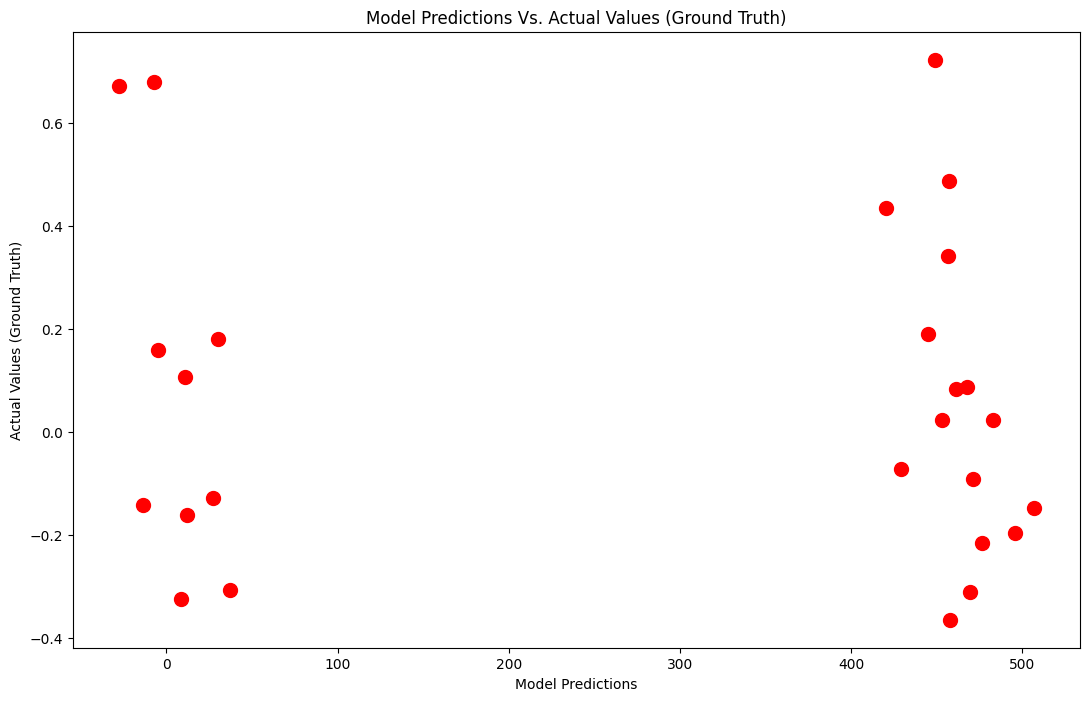

In [118]:
# Plot model predictions "y_predict" vs. actual outputs "y_test" (ground truth data)
plt.figure(figsize = (13, 8))
plt.plot(y_predict, y_test, 'o', color = 'r', markersize = 10)
plt.xlabel('Model Predictions')
plt.ylabel('Actual Values (Ground Truth)')
plt.title('Model Predictions Vs. Actual Values (Ground Truth)');

In [119]:
# Display the trained model Y-intercept
print(linear_regression_model.intercept_)

# Display the estimated coefficients for the linear regression problem
print(linear_regression_model.coef_)

-9.015133585290599
[ 6.19839769e-10  7.73883606e-10 -9.76473769e-08 -9.71849967e-08
  6.25305169e-08 -4.07896268e-08  9.21767370e-09 -9.17752803e-08
  2.24539045e-08  8.19499576e-09  9.80512113e-09 -1.16002640e-07
 -4.53071219e-08  9.51978631e-09 -3.12359123e-08  7.10023287e-07
 -4.53120182e-07  1.41707430e-07  1.00782172e-07 -1.27746387e-07
 -4.07732338e-08  1.44374335e-08  5.32957165e-09  2.99632771e-10
  1.41495535e-10  1.46930617e-08 -1.43730519e-08 -9.57649162e-09
 -1.75431390e-10  4.50923639e-09 -1.48647265e-08 -6.86412426e-09
 -9.54160910e-09 -5.29507113e-10 -1.78899988e-09  7.06073988e-10
  1.19209319e-09 -1.40193046e-09 -2.82262483e-10 -1.14082302e-08
 -2.35667766e-09 -1.67784807e-08  1.73315508e-08  1.69759133e-08
  5.75119742e-10 -2.19201999e-11  8.22281401e-09 -2.33530642e-08
 -2.26878459e-08 -3.49555432e-10  3.10904161e-08  8.70072027e-09
  6.65100851e-09  6.31791268e-09  4.69257887e-09  5.27510932e-09
  5.27510862e-09 -3.26729633e-09  1.01074137e-07  2.53350692e-10
  4.15

# TRAIN AND EVALUATE A RANDOM FOREST ALGORITHM

In [120]:
# Import Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regression model
# n_estimators: represents the number of trees in the forest
# max_depth: represents the maximum depth of the tree
random_forest_model = RandomForestRegressor(n_estimators = 5, max_depth = 10);
random_forest_model.fit(X_train, y_train);

In [121]:
# Evaluate trained Random Forest Regression model
y_predict = random_forest_model.predict(X_test)

In [122]:
# Let's generate various regression metrics by comparing "y_predict" vs. actual outputs "y_test" (ground truth data)
RMSE = float(np.sqrt(mean_squared_error(y_test, y_predict)))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)

print('Root Mean Squared Error (RMSE) =', RMSE, '\nMean Squared Error (MSE) =', MSE, '\nMean Absolute Error (MAE) =', MAE) 

Root Mean Squared Error (RMSE) = 0.13907227382001744 
Mean Squared Error (MSE) = 0.019341097345469904 
Mean Absolute Error (MAE) = 0.11495193953846151


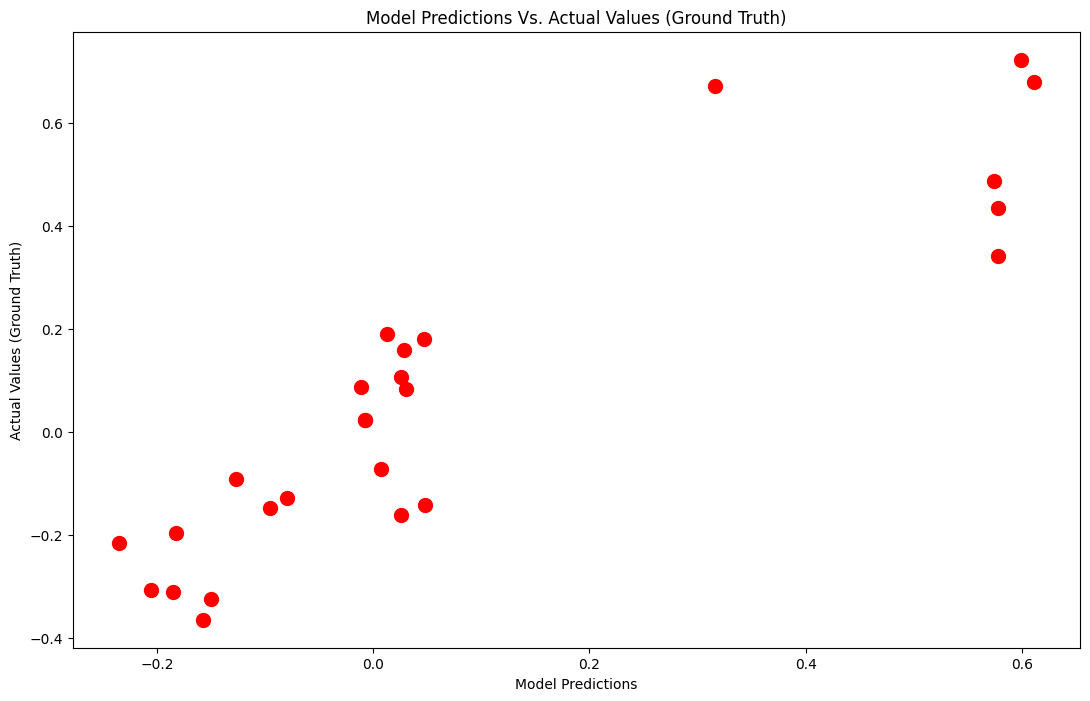

In [123]:
# Plot model predictions "y_predict" vs. actual outputs "y_test" (ground truth data)
plt.figure(figsize = (13, 8))
plt.plot(y_predict, y_test, 'o', color = 'r', markersize = 10)
plt.xlabel('Model Predictions')
plt.ylabel('Actual Values (Ground Truth)')
plt.title('Model Predictions Vs. Actual Values (Ground Truth)');

# TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK TO SOLVE REGRESSION PROBLEMS

In [ ]:
# Let's train an Artificial Neural Network to solve regression type problems using Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras


In [125]:
# Let's perform input data scaling using MinMaxScaler() from Scikit-Learn library 
# Data scaling is an important pre-processing step in Artificial Neural Networks training 
# It improves model performance and speed up the training process
# Scaling works by normalizing features so they can have similar ranges and distributions so no feature dominates other features  
# Note that tree-based algorithms do not require data scaling
# MinMaxScaler scales the data to a range between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler();
scaler.fit(X_train);

In [126]:
# Apply data scaling to the training and testing datasets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [128]:
# Let's perform output data scaling 
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(y_train))

# Apply data scaling to the training and testing datasets
y_train_scaled = scaler.transform(pd.DataFrame(y_train))
y_test_scaled = scaler.transform(pd.DataFrame(y_test))

In [129]:
# Size of the input dataset
X_train.shape[1]

194

In [ ]:
# Let's build our ANN using Keras API 
# Keras sequential model allows for building ANNs which consist of sequential layers (input, hidden..etc.)
# Dense means each neuron in the layer is fully connected to all the neurons in the previous layer  
# Normalization layer normalizes its inputs by applies a transformation to maintain the mean output close to 0 
# and standard deviation close to 1.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization, Dropout

ANN_model = Sequential()
ANN_model.add(Normalization(input_shape = [X_train.shape[1],], axis = None))
ANN_model.add(Dense(1024, activation = 'relu'))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(512, activation = 'relu'))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(256, activation = 'sigmoid'))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(32, activation = 'sigmoid'))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(units = 1, activation = 'linear'))

In [131]:
# Let's obtain the model summary
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 194)               3         
 on)                                                             
                                                                 
 dense (Dense)               (None, 1024)              199680    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                        

In [ ]:
# Let's compile the model
# Adam optimizer is the extended version of stochastic gradient descent algorithm 
# It works well in deep learning applications and ANNs training 
ANN_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001), loss = 'mean_squared_error')

# Let's fit the model using 500 epochs
history = ANN_model.fit(X_train_scaled, y_train_scaled, epochs = 500)

In [ ]:
# Let's generate model predictions using the testing dataset and then scale the data back to its original range values
y_predict_scaled = ANN_model.predict(X_test_scaled)
y_predict = scaler.inverse_transform(y_predict_scaled)
y_test = scaler.inverse_transform(y_test_scaled)

In [134]:
# Let's generate various regression metrics by comparing "y_predict" vs. actual outputs "y_test" (ground truth data)
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np 

RMSE = float(np.sqrt(mean_squared_error(y_test, y_predict)))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)

print('Root Mean Squared Error (RMSE) =', RMSE, '\nMean Squared Error (MSE) =', MSE, '\nMean Absolute Error (MAE) =', MAE) 

Root Mean Squared Error (RMSE) = 0.2950951838704968 
Mean Squared Error (MSE) = 0.08708116754356232 
Mean Absolute Error (MAE) = 0.2395140249484666


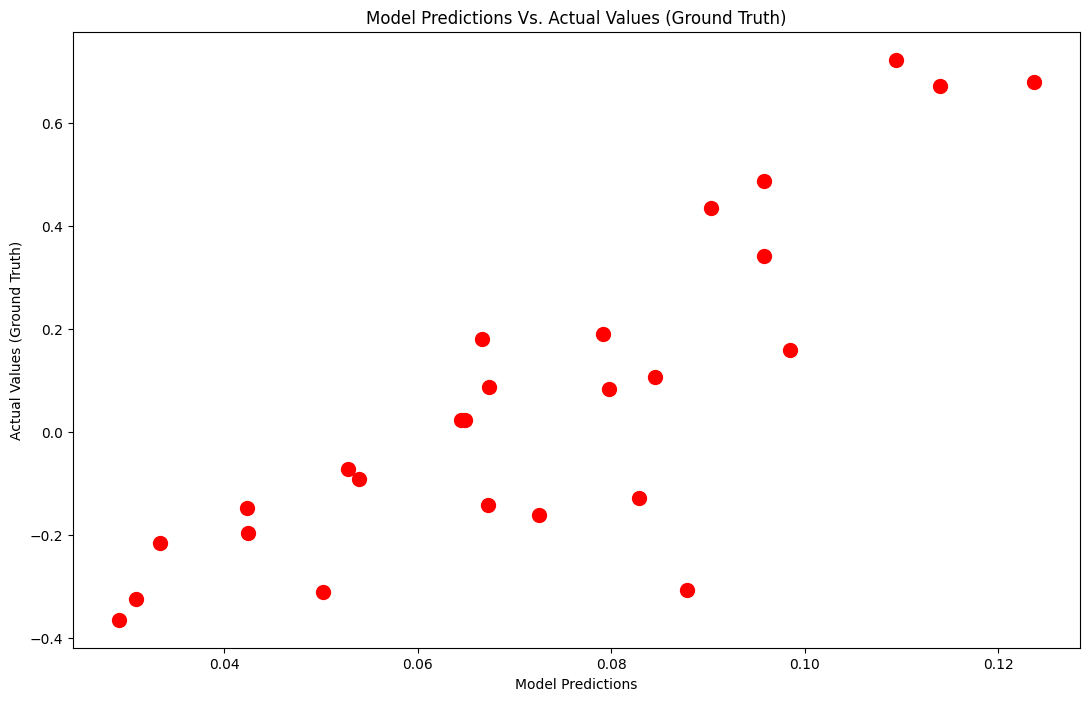

In [135]:
# Plot model predictions "y_predict" vs. actual outputs "y_test" (ground truth data)
plt.figure(figsize = (13, 8))
plt.plot(y_predict, y_test, 'o', color = 'r', markersize = 10)
plt.xlabel('Model Predictions')
plt.ylabel('Actual Values (Ground Truth)')
plt.title('Model Predictions Vs. Actual Values (Ground Truth)');

# TRAIN AND EVALUATE AN XGBOOST MODEL

In [136]:
# Import XGBoost
import xgboost as xgb

In [137]:
# Train an XGBoost regressor model 
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', 
                             learning_rate = 0.1, 
                             max_depth = 3, 
                             n_estimators = 200);
xgb_model.fit(X_train, y_train);

In [138]:
# Make predictions on the test data
y_predict = xgb_model.predict(X_test)
y_predict

array([ 0.0915549 ,  0.01213922,  0.51923114, -0.2647529 ,  0.03256037,
        0.04569988,  0.58129025, -0.16422173, -0.00409916,  0.01620112,
        0.58669657, -0.1648339 ,  0.00810449,  0.02311258,  0.5593822 ,
       -0.1714481 ,  0.00882772,  0.07546706,  0.48460865, -0.14964783,
       -0.0881293 ,  0.0560329 ,  0.5719584 , -0.16495349,  0.0360399 ,
        0.05683483], dtype=float32)

In [139]:
# Let's generate various regression metrics by comparing "y_predict" vs. actual outputs "y_test" (ground truth data)
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np 

RMSE = float(np.sqrt(mean_squared_error(y_test, y_predict)))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)

print('Root Mean Squared Error (RMSE) =', RMSE, '\nMean Squared Error (MSE) =', MSE, '\nMean Absolute Error (MAE) =', MAE) 

Root Mean Squared Error (RMSE) = 0.1373041670710374 
Mean Squared Error (MSE) = 0.018852434295071354 
Mean Absolute Error (MAE) = 0.11650147747960513


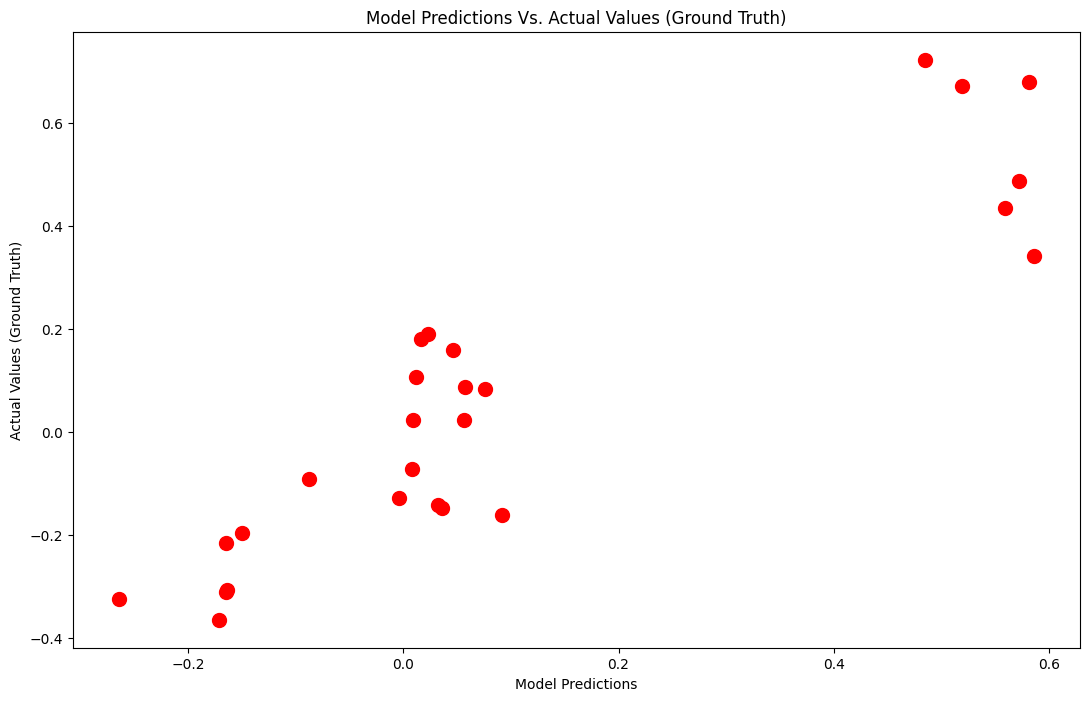

In [140]:
# Plot model predictions "y_predict" vs. actual outputs "y_test" (ground truth data)
plt.figure(figsize = (13, 8))
plt.plot(y_predict, y_test, 'o', color = 'r', markersize = 10)
plt.xlabel('Model Predictions')
plt.ylabel('Actual Values (Ground Truth)')
plt.title('Model Predictions Vs. Actual Values (Ground Truth)');

# PERFORM HYPERPARAMETERS OPTIMIZATION

In [141]:
# GridSearchCV performs exhaustive search over a specified list of parameters
# You provide the algorithm with the hyperparameters and values you would like to experiment with 
# Note that you will have the following number of combinations: 4 * 4 * 4 * 3 = 192
# We will run each combination 5 times since we set the cross validation = 5
# Total number of runs = 192 * 5 = 960 fits

from sklearn.model_selection import GridSearchCV

In [142]:
# Specify the parameters grid
parameters_grid = {'max_depth': [1, 3, 5, 10],
                   'learning_rate': [0.01, 0.1, 0.5, 1],
                   'n_estimators': [10, 50, 100, 200],
                   'subsample': [0.5, 0.75, 1.0]} 

In [143]:
# Note that "neg_mean_squared_error" is used for scoring since our goal is to minimize the error
# GridSearchCV() ranks all algorithms (estimators) and specifies which one is the best
# cv stands for the number of cross-validation folds which is set to 5 by default
# Verbose controls the verbosity: the higher the number, the more messages to be displayed

xgb_gridsearch = GridSearchCV(estimator = xgb.XGBRegressor(objective = 'reg:squarederror'), 
                              param_grid = parameters_grid, 
                              scoring = 'neg_mean_squared_error',  
                              cv = 5, 
                              verbose = 5)

In [ ]:
# Let's fit the model
xgb_gridsearch.fit(X_train, y_train)

In [145]:
# Indicate best parameters after grid search optimization
xgb_gridsearch.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.5}

In [ ]:
# Display the best estimator values
xgb_gridsearch.best_estimator_

In [147]:
# Generate predictions based on the optimal model parameters
y_predict = xgb_gridsearch.predict(X_test)
y_predict

array([ 0.02472107,  0.01410163,  0.4170178 , -0.25977236, -0.04213566,
        0.06121715,  0.46534327, -0.24238317,  0.05341711,  0.07604338,
        0.48370004, -0.17920546, -0.06337053,  0.03104769,  0.29105464,
       -0.24457559,  0.01597193,  0.02695176,  0.39400026, -0.13559188,
       -0.15582141,  0.05432441,  0.43488196, -0.2314851 , -0.10423933,
       -0.03719773], dtype=float32)

In [148]:
# Let's generate various regression metrics by comparing "y_predict" vs. actual outputs "y_test" (ground truth data)
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np 

RMSE = float(np.sqrt(mean_squared_error(y_test, y_predict)))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)

print('Root Mean Squared Error (RMSE) =', RMSE, '\nMean Squared Error (MSE) =', MSE, '\nMean Absolute Error (MAE) =', MAE) 

Root Mean Squared Error (RMSE) = 0.1336988046514594 
Mean Squared Error (MSE) = 0.017875370365229102 
Mean Absolute Error (MAE) = 0.1097305002593924


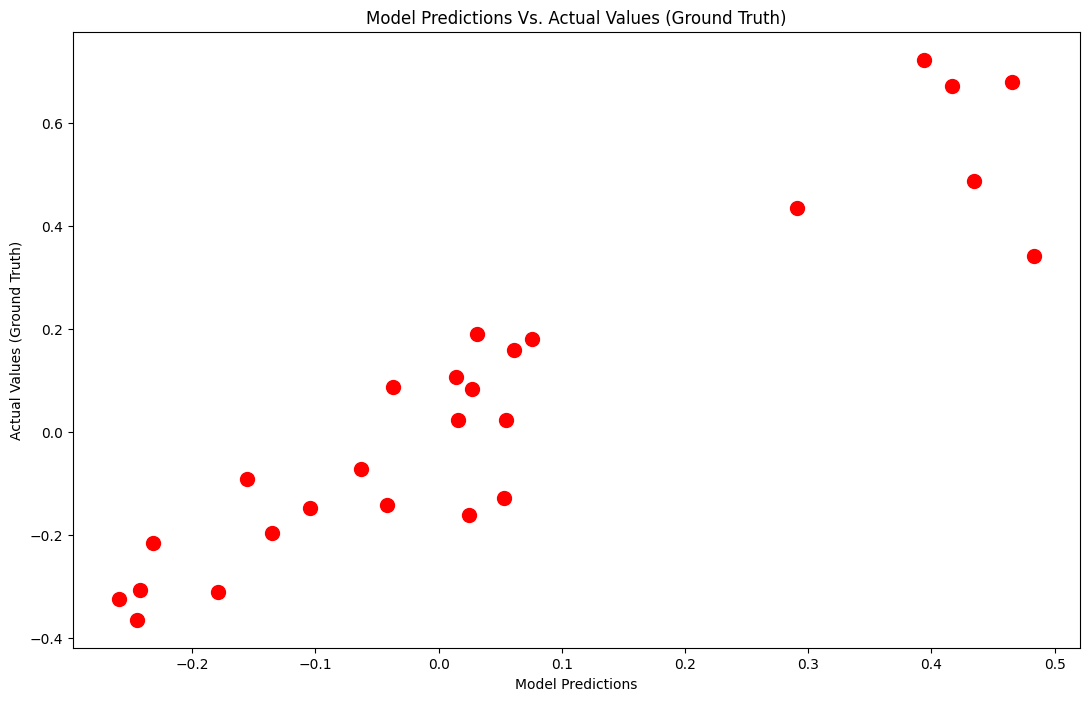

In [149]:
# Plot model predictions "y_predict" vs. actual outputs "y_test" (ground truth data)
plt.figure(figsize = (13, 8))
plt.plot(y_predict, y_test, 'o', color = 'r', markersize = 10)
plt.xlabel('Model Predictions')
plt.ylabel('Actual Values (Ground Truth)')
plt.title('Model Predictions Vs. Actual Values (Ground Truth)');

## Doing PCA to test improvement in the performance

In [150]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define input (features) and output (target)
X = apple_df.drop(['% Change in Quarterly Revenue (Target Output)'], axis=1)
y = apple_df['% Change in Quarterly Revenue (Target Output)']

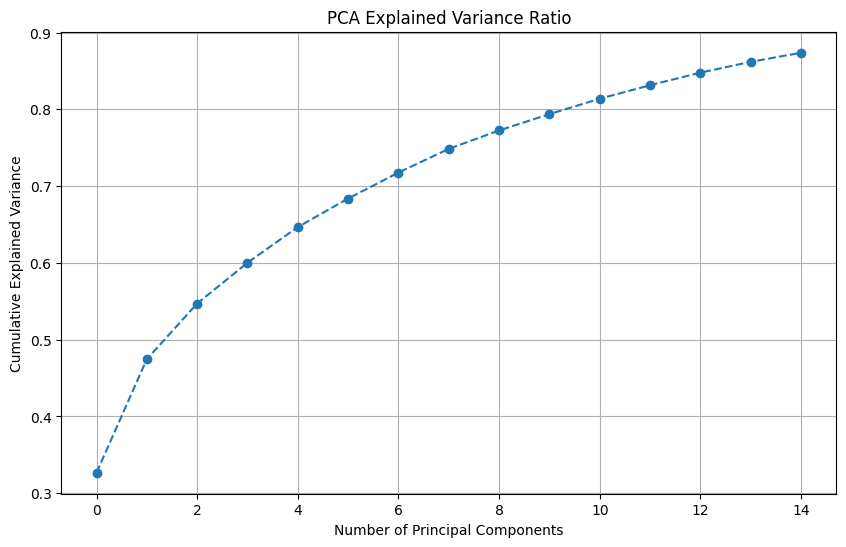

,PC1,PC2,PC3,PC4,PC5,...,PC15,Q1,Q2,Q3,Q4
0,-7.100097,-6.863849,2.946488,-2.148379,2.761366,...,-0.940463,False,False,True,False
1,-7.032557,-4.840820,3.607108,-2.187877,2.137163,...,-1.838112,False,False,False,True
2,-7.300214,-5.996647,1.445212,0.761164,-2.442707,...,7.094968,True,False,False,False
3,-6.892977,-4.850964,1.485201,-2.042452,0.498531,...,1.543917,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
55,14.723571,-2.055057,0.063183,-0.375923,-3.417985,...,-2.254295,False,True,False,False
56,13.544444,-5.676526,-0.766210,-1.057293,-3.383931,...,-0.848064,False,False,True,False
57,15.918616,-6.697519,1.474215,-2.829312,-0.981192,...,0.330632,False,False,False,True
58,19.885066,-1.801494,3.320352,-1.024766,-0.004005,...,-0.950599,True,False,False,False


In [151]:
# Identify categorical columns (assuming one-hot encoded are boolean)
categorical_cols = X.select_dtypes(include=['bool']).columns
numerical_cols = X.select_dtypes(include=['int', 'float64', 'int64']).columns.difference(categorical_cols)

# Split dataset first to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Standardize only numerical features
scaler = StandardScaler()
X_train_numerical_scaled = scaler.fit_transform(X_train[numerical_cols])  # Fit on train
X_test_numerical_scaled = scaler.transform(X_test[numerical_cols])  # Transform test

# Apply PCA only on numerical data (fit on train, transform test)
pca = PCA(n_components=15)  # Adjust components dynamically if needed
X_train_pca = pca.fit_transform(X_train_numerical_scaled)  # Fit on train
X_test_pca = pca.transform(X_test_numerical_scaled)  # Transform test

# Visualize Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance Ratio')
plt.grid()
plt.show()

# Retain categorical (one-hot) columns as they are
X_train_categorical = X_train[categorical_cols].reset_index(drop=True)
X_test_categorical = X_test[categorical_cols].reset_index(drop=True)

# Convert PCA output to DataFrame
X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])])

# Concatenate PCA-transformed numerical data with categorical features
X_train_final = pd.concat([X_train_pca_df, X_train_categorical.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test_pca_df, X_test_categorical.reset_index(drop=True)], axis=1)

# Output the transformed train set
X_train_final


In [152]:
X_train=X_train_final
X_test=X_test_final

In [153]:
# Check out the shape of input data after train/test split operation 
print(X_train.shape, X_test.shape)
# Check out the shape of output data after train/test split operation 
print(y_train.shape, y_test.shape)
# Display the training set 
# Note that no data shuffling took place because it has been disabled by setting "shuffle = False"

(59, 19) (26, 19)
(59,) (26,)


# TRAIN AND EVALUATE A LINEAR REGRESSION MODEL

In [154]:
# Import linear_model from Scikit-Learn Library 
from sklearn import linear_model

# Train a linear regression model using Scikit-Learn Library
# First we instantiate an object out of our linear_model class
# Then we apply the fit() method to fit the model to the training dataset (X_train, y_trian)
linear_regression_model = linear_model.LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [155]:
# After the regression model is trained, we evaluate its performance on the testing dataset
# Note that the testing dataset has never been seen by the model during training
# Now we can compare y_predict vs. the actual output y_test (ground truth data)
y_predict = linear_regression_model.predict(X_test)

In [156]:
# Let's generate various regression metrics by comparing "y_predict" to actual outputs "y_test" (ground truth data)
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np 

RMSE = float(np.sqrt(mean_squared_error(y_test, y_predict)))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)

print('Root Mean Squared Error (RMSE) =', RMSE, '\nMean Squared Error (MSE) =', MSE, '\nMean Absolute Error (MAE) =', MAE) 

Root Mean Squared Error (RMSE) = 0.24911998747923073 
Mean Squared Error (MSE) = 0.06206076816165207 
Mean Absolute Error (MAE) = 0.20751486712947795


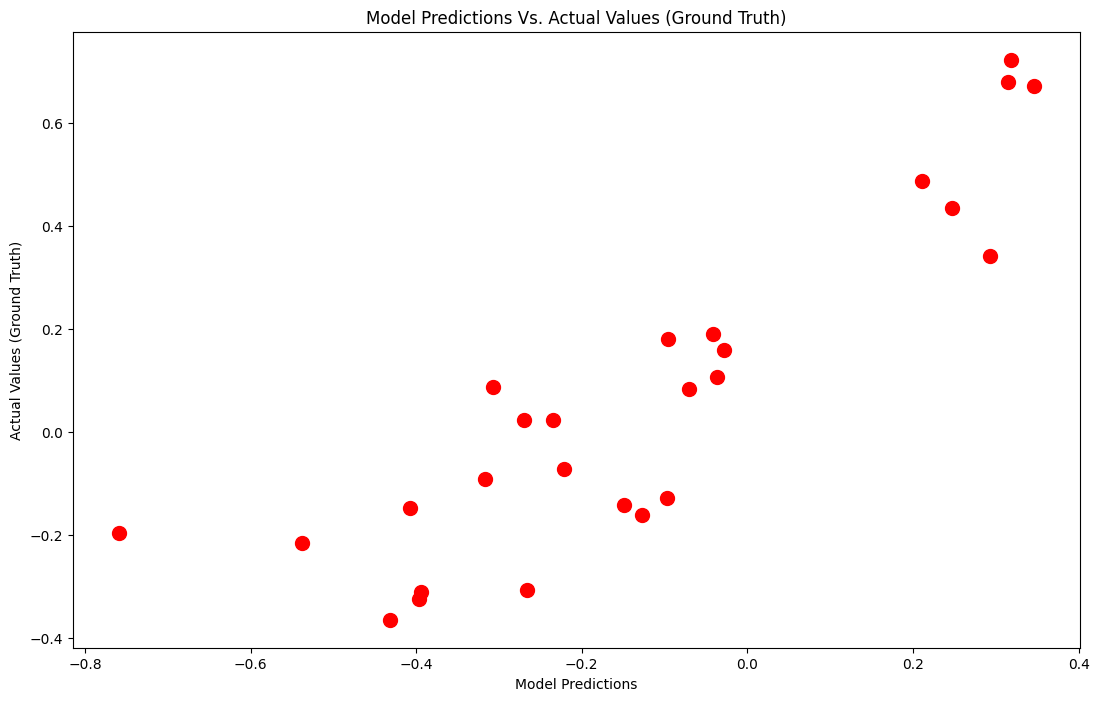

In [157]:
# Plot model predictions "y_predict" vs. actual outputs "y_test" (ground truth data)
plt.figure(figsize = (13, 8))
plt.plot(y_predict, y_test, 'o', color = 'r', markersize = 10)
plt.xlabel('Model Predictions')
plt.ylabel('Actual Values (Ground Truth)')
plt.title('Model Predictions Vs. Actual Values (Ground Truth)');

In [158]:
# Display the trained model Y-intercept
print(linear_regression_model.intercept_)

# Display the estimated coefficients for the linear regression problem
print(linear_regression_model.coef_)

0.08834590808884978
[-1.60736413e-03  2.50961055e-03 -3.49196428e-03 -1.55975706e-04
 -1.23485433e-02 -1.84889252e-02 -1.45404165e-02 -1.35371065e-02
  4.41507226e-03 -1.01371173e-02 -1.60870924e-02  1.41952401e-02
  2.35746669e-03  2.28285342e-02  1.74003849e-02 -2.09667144e-01
 -7.35724488e-02 -5.01208877e-02  3.33360480e-01]


# TRAIN AND EVALUATE A RANDOM FOREST ALGORITHM

In [159]:
# Import Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regression model
# n_estimators: represents the number of trees in the forest
# max_depth: represents the maximum depth of the tree
random_forest_model = RandomForestRegressor(n_estimators = 5, max_depth = 10);
random_forest_model.fit(X_train, y_train);

In [160]:
# Evaluate trained Random Forest Regression model
y_predict = random_forest_model.predict(X_test)

In [161]:
# Let's generate various regression metrics by comparing "y_predict" vs. actual outputs "y_test" (ground truth data)
RMSE = float(np.sqrt(mean_squared_error(y_test, y_predict)))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)

print('Root Mean Squared Error (RMSE) =', RMSE, '\nMean Squared Error (MSE) =', MSE, '\nMean Absolute Error (MAE) =', MAE) 

Root Mean Squared Error (RMSE) = 0.12482393981113259 
Mean Squared Error (MSE) = 0.01558101594997325 
Mean Absolute Error (MAE) = 0.09988277159230768


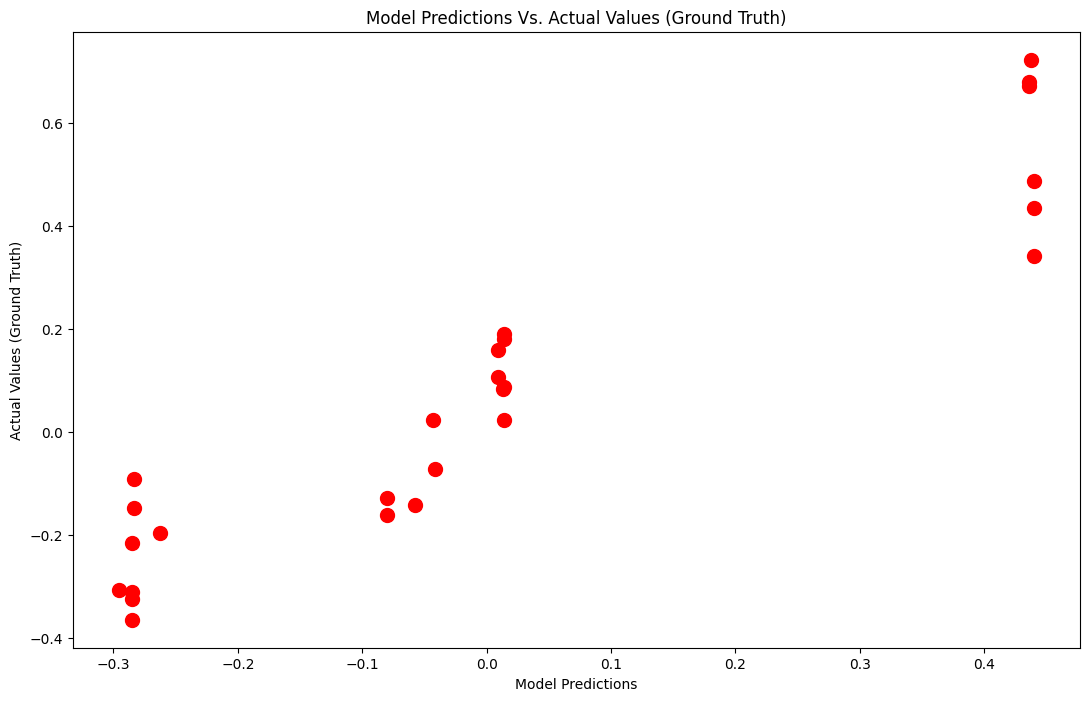

In [162]:
# Plot model predictions "y_predict" vs. actual outputs "y_test" (ground truth data)
plt.figure(figsize = (13, 8))
plt.plot(y_predict, y_test, 'o', color = 'r', markersize = 10)
plt.xlabel('Model Predictions')
plt.ylabel('Actual Values (Ground Truth)')
plt.title('Model Predictions Vs. Actual Values (Ground Truth)');

# TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK TO SOLVE REGRESSION PROBLEMS

In [163]:
# Let's train an Artificial Neural Network to solve regression type problems using Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras

In [164]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler();
scaler.fit(X_train);

In [165]:
# Apply data scaling to the training and testing datasets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [167]:
# Let's perform output data scaling 
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(y_train))

# Apply data scaling to the training and testing datasets
y_train_scaled = scaler.transform(pd.DataFrame(y_train))
y_test_scaled = scaler.transform(pd.DataFrame(y_test))

In [168]:
# Size of the input dataset
X_train.shape[1]

19

In [169]:
# Let's build our ANN using Keras API 
# Keras sequential model allows for building ANNs which consist of sequential layers (input, hidden..etc.)
# Dense means each neuron in the layer is fully connected to all the neurons in the previous layer  
# Normalization layer normalizes its inputs by applies a transformation to maintain the mean output close to 0 
# and standard deviation close to 1.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization, Dropout

ANN_model = Sequential()
ANN_model.add(Normalization(input_shape = [X_train.shape[1],], axis = None))
ANN_model.add(Dense(1024, activation = 'relu'))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(512, activation = 'relu'))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(256, activation = 'sigmoid'))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(32, activation = 'sigmoid'))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(units = 1, activation = 'linear'))

In [170]:
# Let's obtain the model summary
ANN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 19)                3         
 tion)                                                           
                                                                 
 dense_5 (Dense)             (None, 1024)              20480     
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                      

In [ ]:
# Let's compile the model
# Adam optimizer is the extended version of stochastic gradient descent algorithm 
# It works well in deep learning applications and ANNs training 
ANN_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001), loss = 'mean_squared_error')

# Let's fit the model using 500 epochs
history = ANN_model.fit(X_train_scaled, y_train_scaled, epochs = 500)

In [172]:
# Let's generate model predictions using the testing dataset and then scale the data back to its original range values
y_predict_scaled = ANN_model.predict(X_test_scaled)
y_predict = scaler.inverse_transform(y_predict_scaled)
y_test = scaler.inverse_transform(y_test_scaled)

1/1 [==============================] - 0s 76ms/step


In [173]:
# Let's generate various regression metrics by comparing "y_predict" vs. actual outputs "y_test" (ground truth data)
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np 

RMSE = float(np.sqrt(mean_squared_error(y_test, y_predict)))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)

print('Root Mean Squared Error (RMSE) =', RMSE, '\nMean Squared Error (MSE) =', MSE, '\nMean Absolute Error (MAE) =', MAE) 

Root Mean Squared Error (RMSE) = 0.2975804014595223 
Mean Squared Error (MSE) = 0.08855409533281046 
Mean Absolute Error (MAE) = 0.2569551748712798


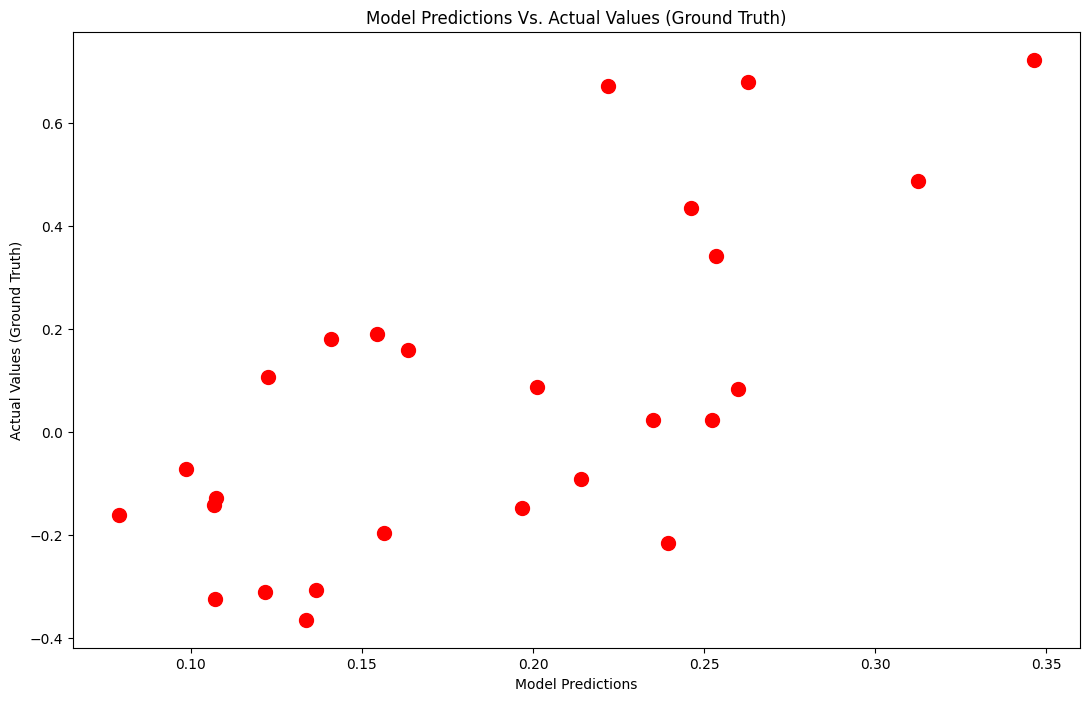

In [174]:
# Plot model predictions "y_predict" vs. actual outputs "y_test" (ground truth data)
plt.figure(figsize = (13, 8))
plt.plot(y_predict, y_test, 'o', color = 'r', markersize = 10)
plt.xlabel('Model Predictions')
plt.ylabel('Actual Values (Ground Truth)')
plt.title('Model Predictions Vs. Actual Values (Ground Truth)');

# TRAIN AND EVALUATE AN XGBOOST MODEL

In [175]:
# Import XGBoost
import xgboost as xgb

In [176]:
# Train an XGBoost regressor model 
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', 
                             learning_rate = 0.1, 
                             max_depth = 3, 
                             n_estimators = 200);
xgb_model.fit(X_train, y_train);

In [177]:
# Make predictions on the test data
y_predict = xgb_model.predict(X_test)
y_predict

array([-0.06301019,  0.05193326,  0.46368143, -0.30830488, -0.05262833,
        0.07158342,  0.45204335, -0.23518482, -0.05177094,  0.01571734,
        0.4474689 , -0.22934073, -0.08672671,  0.01252639,  0.4511066 ,
       -0.27705997, -0.02390686, -0.00983491,  0.46352673, -0.24424262,
       -0.16618702, -0.02801591,  0.4515385 , -0.2814818 , -0.17003274,
       -0.01652332], dtype=float32)

In [178]:
# Let's generate various regression metrics by comparing "y_predict" vs. actual outputs "y_test" (ground truth data)
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np 

RMSE = float(np.sqrt(mean_squared_error(y_test, y_predict)))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)

print('Root Mean Squared Error (RMSE) =', RMSE, '\nMean Squared Error (MSE) =', MSE, '\nMean Absolute Error (MAE) =', MAE) 

Root Mean Squared Error (RMSE) = 0.11190532445410115 
Mean Squared Error (MSE) = 0.012522801641177648 
Mean Absolute Error (MAE) = 0.09173216726169937


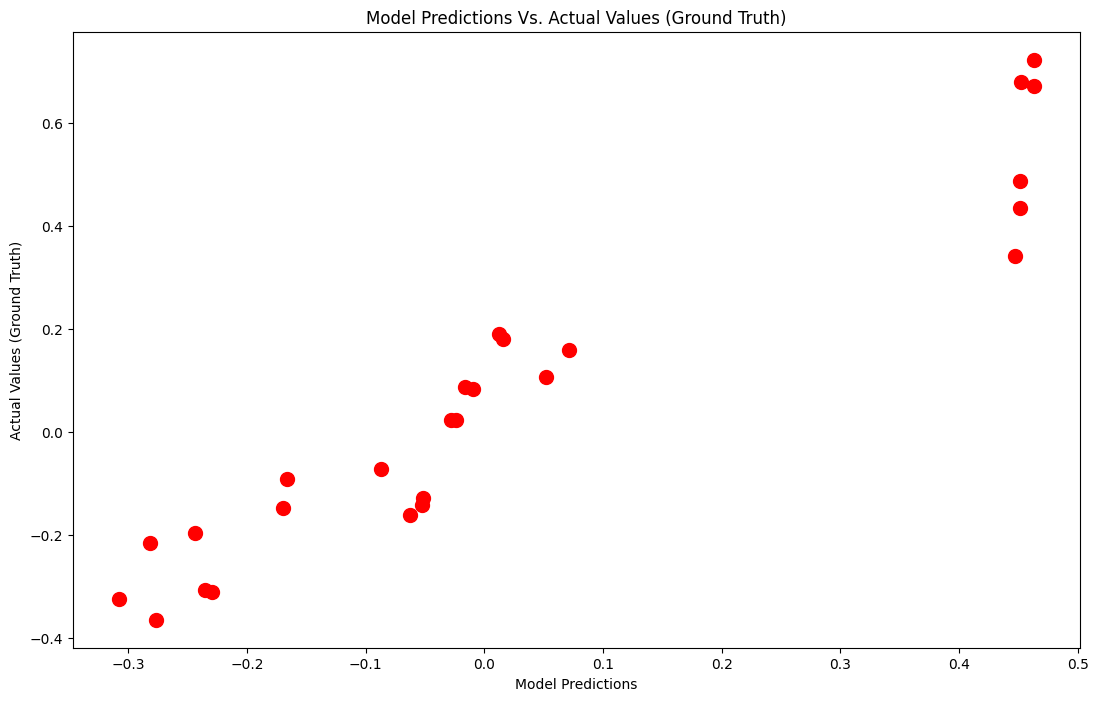

In [179]:
# Plot model predictions "y_predict" vs. actual outputs "y_test" (ground truth data)
plt.figure(figsize = (13, 8))
plt.plot(y_predict, y_test, 'o', color = 'r', markersize = 10)
plt.xlabel('Model Predictions')
plt.ylabel('Actual Values (Ground Truth)')
plt.title('Model Predictions Vs. Actual Values (Ground Truth)');

# PERFORM HYPERPARAMETERS OPTIMIZATION

In [180]:
# GridSearchCV performs exhaustive search over a specified list of parameters
# You provide the algorithm with the hyperparameters and values you would like to experiment with 
# Note that you will have the following number of combinations: 4 * 4 * 4 * 3 = 192
# We will run each combination 5 times since we set the cross validation = 5
# Total number of runs = 192 * 5 = 960 fits

from sklearn.model_selection import GridSearchCV

In [181]:
# Specify the parameters grid
parameters_grid = {'max_depth': [1, 3, 5, 10],
                   'learning_rate': [0.01, 0.1, 0.5, 1],
                   'n_estimators': [10, 50, 100, 200],
                   'subsample': [0.5, 0.75, 1.0]} 

In [182]:
# Note that "neg_mean_squared_error" is used for scoring since our goal is to minimize the error
# GridSearchCV() ranks all algorithms (estimators) and specifies which one is the best
# cv stands for the number of cross-validation folds which is set to 5 by default
# Verbose controls the verbosity: the higher the number, the more messages to be displayed

xgb_gridsearch = GridSearchCV(estimator = xgb.XGBRegressor(objective = 'reg:squarederror'), 
                              param_grid = parameters_grid, 
                              scoring = 'neg_mean_squared_error',  
                              cv = 5, 
                              verbose = 5)

In [ ]:
# Let's fit the model
xgb_gridsearch.fit(X_train, y_train)

In [184]:
# Indicate best parameters after grid search optimization
xgb_gridsearch.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.5}

In [185]:
# Display the best estimator values
xgb_gridsearch.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [186]:
# Generate predictions based on the optimal model parameters
y_predict = xgb_gridsearch.predict(X_test)
y_predict

array([-0.00915112,  0.09800143,  0.41380724, -0.280847  , -0.09997608,
        0.08561   ,  0.39146793, -0.21059962, -0.04184492,  0.05251387,
        0.3761593 , -0.24650958, -0.04566637,  0.02283098,  0.3991823 ,
       -0.2741506 , -0.00910045,  0.00657241,  0.46993276, -0.28566888,
       -0.17663036, -0.04695093,  0.3917867 , -0.29387987, -0.1961362 ,
       -0.02158701], dtype=float32)

In [187]:
# Let's generate various regression metrics by comparing "y_predict" vs. actual outputs "y_test" (ground truth data)
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np 

RMSE = float(np.sqrt(mean_squared_error(y_test, y_predict)))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)

print('Root Mean Squared Error (RMSE) =', RMSE, '\nMean Squared Error (MSE) =', MSE, '\nMean Absolute Error (MAE) =', MAE) 

Root Mean Squared Error (RMSE) = 0.12084028851688368 
Mean Squared Error (MSE) = 0.014602375328843691 
Mean Absolute Error (MAE) = 0.09759884018816892


Text(0.5, 1.0, 'Model Predictions Vs. Actual Values (Ground Truth)')

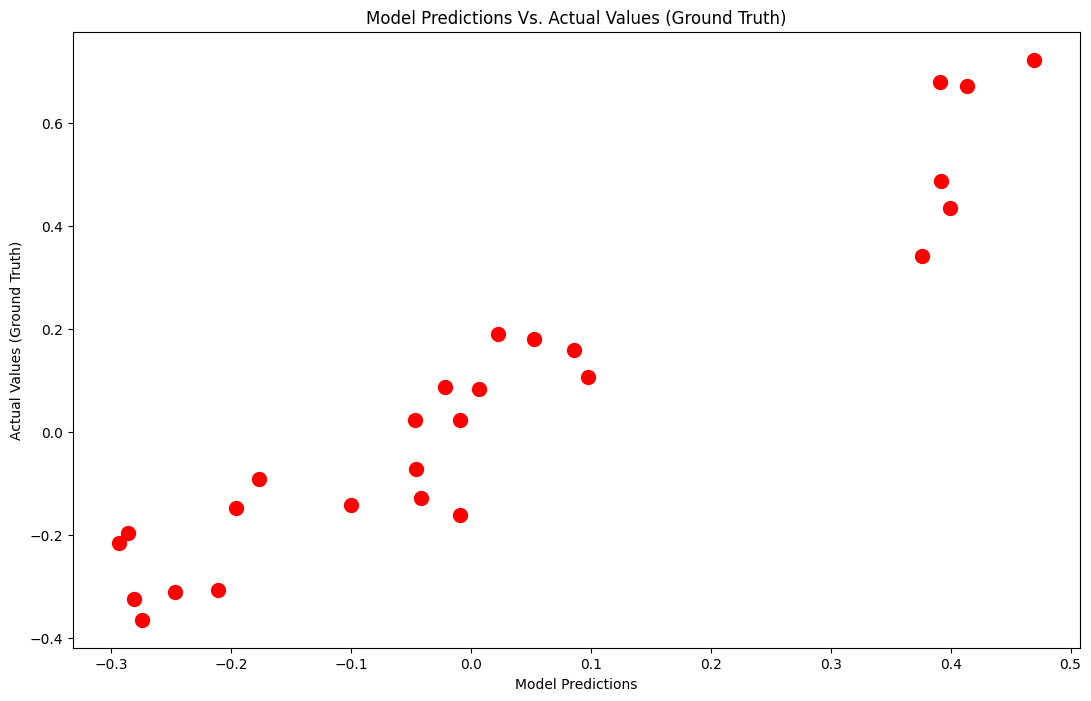

In [188]:
# Plot model predictions "y_predict" vs. actual outputs "y_test" (ground truth data)
plt.figure(figsize = (13, 8))
plt.plot(y_predict, y_test, 'o', color = 'r', markersize = 10)
plt.xlabel('Model Predictions')
plt.ylabel('Actual Values (Ground Truth)')
plt.title('Model Predictions Vs. Actual Values (Ground Truth)')

# PERORMING TARGETTED PCA (decompostion of features into bins)

In [189]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
df = X_train
df_test = X_test.copy()

# 1. Define the feature groups (baskets)
feature_groups = {
    "shares": [col for col in df.columns if "Share" in col],
    "sales_ratios": [col for col in df.columns if "Sales Per Share" in col or "Revenue" in col],
    "income": [col for col in df.columns if "Income" in col or "EBITDA" in col],
    "profitability": [col for col in df.columns if "Margin" in col or "Return on" in col or "ROIC" in col],
    "assets": [col for col in df.columns if "Asset" in col],
    "liabilities_equity": [col for col in df.columns if "Liabilities" in col or "Equity" in col or "Debt" in col],
    "cashflow": [col for col in df.columns if "Cash" in col or "Free Cash Flow" in col],
    "per_share": [col for col in df.columns if "Per Share" in col and "Sales" not in col],
    "ratios": [col for col in df.columns if "Ratio" in col],
    "pitro": [col for col in df.columns if "Piotroski" in col], 
}

# 2. Identify standalone features
grouped_features = set(sum(feature_groups.values(), []))
standalone_features = [col for col in df.columns if col not in grouped_features and df[col].dtype in [float, int]]
standalone_features = [col for col in standalone_features if df[col].dtype != 'bool']

# 3. Initialize containers
pca_results = []
explained_variances = {}
component_counts = {}
scalers = {}
pcas = {}

# 4. Fit PCA on training data
for group_name, cols in feature_groups.items():
    valid_cols = [col for col in cols if col in df.columns and df[col].dtype in [float, int]]
    if len(valid_cols) >= 2:
        data = df[valid_cols].dropna()
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(data)

        full_pca = PCA()
        full_pca.fit(X_scaled)
        cumulative_variance = full_pca.explained_variance_ratio_.cumsum()
        n_components = (cumulative_variance >= 0.85).argmax() + 1

        pca = PCA(n_components=n_components)
        components = pca.fit_transform(X_scaled)

        scalers[group_name] = scaler
        pcas[group_name] = pca
        explained_variances[group_name] = pca.explained_variance_ratio_
        component_counts[group_name] = n_components

        component_df = pd.DataFrame(
            components,
            columns=[f"{group_name}_PCA_{i+1}" for i in range(n_components)],
            index=data.index
        )
        pca_results.append(component_df)

# 5. Print explained variance
print("\nExplained Variance by PCA (≥85% Threshold):\n")
for group, var_ratio in explained_variances.items():
    total = var_ratio.sum() * 100
    comps = component_counts[group]
    comp_breakdown = " + ".join(f"{v*100:.2f}%" for v in var_ratio)
    print(f"{group}: {total:.2f}% total variance explained with {comps} components "
          f"({comp_breakdown})")

# 6. Final transformed X_train
final_df = pd.concat(pca_results + [df[standalone_features]], axis=1)

# 7. Apply same PCA to X_test
pca_test_results = []
for group_name, cols in feature_groups.items():
    valid_cols = [col for col in cols if col in df_test.columns and df_test[col].dtype in [float, int]]
    if group_name in scalers and group_name in pcas and len(valid_cols) >= 2:
        data = df_test[valid_cols].dropna()
        scaler = scalers[group_name]
        pca = pcas[group_name]

        X_scaled = scaler.transform(data)
        components = pca.transform(X_scaled)

        component_df = pd.DataFrame(
            components,
            columns=[f"{group_name}_PCA_{i+1}" for i in range(pca.n_components_)],
            index=data.index
        )
        pca_test_results.append(component_df)

# 8. Final transformed X_test
standalone_test = [col for col in standalone_features if col in df_test.columns and df_test[col].dtype != 'bool']
final_test_df = pd.concat(pca_test_results + [df_test[standalone_test]], axis=1)

# final_df: reduced & transformed X_train
# final_test_df: reduced & transformed X_test



Explained Variance by PCA (≥85% Threshold):

shares: 85.70% total variance explained with 7 components (36.09% + 22.56% + 8.59% + 6.81% + 5.13% + 3.43% + 3.08%)
sales_ratios: 88.23% total variance explained with 3 components (51.51% + 21.69% + 15.03%)
income: 86.16% total variance explained with 11 components (21.73% + 11.45% + 10.28% + 8.21% + 7.09% + 6.16% + 5.43% + 4.78% + 4.00% + 3.75% + 3.29%)
profitability: 88.05% total variance explained with 7 components (29.21% + 16.79% + 13.63% + 12.36% + 7.79% + 4.30% + 3.97%)
assets: 86.34% total variance explained with 4 components (45.32% + 25.79% + 8.97% + 6.26%)
liabilities_equity: 87.23% total variance explained with 9 components (31.44% + 20.06% + 9.83% + 7.49% + 5.43% + 4.17% + 3.77% + 2.64% + 2.40%)
cashflow: 90.08% total variance explained with 5 components (23.92% + 21.50% + 19.24% + 15.32% + 10.11%)
per_share: 88.27% total variance explained with 7 components (28.94% + 22.61% + 12.50% + 8.22% + 7.04% + 5.17% + 3.79%)
ratios: 87.

In [190]:
X_train=final_df
X_test=final_test_df

In [191]:
# Check out the shape of input data after train/test split operation 
print(X_train.shape, X_test.shape)
# Check out the shape of output data after train/test split operation 
print(y_train.shape, y_test.shape)
# Display the training set 
# Note that no data shuffling took place because it has been disabled by setting "shuffle = False"

(59, 71) (26, 71)
(59,) (26,)


# TRAIN AND EVALUATE A LINEAR REGRESSION MODEL

In [192]:
# Import linear_model from Scikit-Learn Library 
from sklearn import linear_model

# Train a linear regression model using Scikit-Learn Library
# First we instantiate an object out of our linear_model class
# Then we apply the fit() method to fit the model to the training dataset (X_train, y_trian)
linear_regression_model = linear_model.LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [193]:
# After the regression model is trained, we evaluate its performance on the testing dataset
# Note that the testing dataset has never been seen by the model during training
# Now we can compare y_predict vs. the actual output y_test (ground truth data)
y_predict = linear_regression_model.predict(X_test)

In [194]:
# Let's generate various regression metrics by comparing "y_predict" to actual outputs "y_test" (ground truth data)
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np 

RMSE = float(np.sqrt(mean_squared_error(y_test, y_predict)))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)

print('Root Mean Squared Error (RMSE) =', RMSE, '\nMean Squared Error (MSE) =', MSE, '\nMean Absolute Error (MAE) =', MAE) 

Root Mean Squared Error (RMSE) = 8.439798530419255 
Mean Squared Error (MSE) = 71.230199234067 
Mean Absolute Error (MAE) = 7.09477290859466


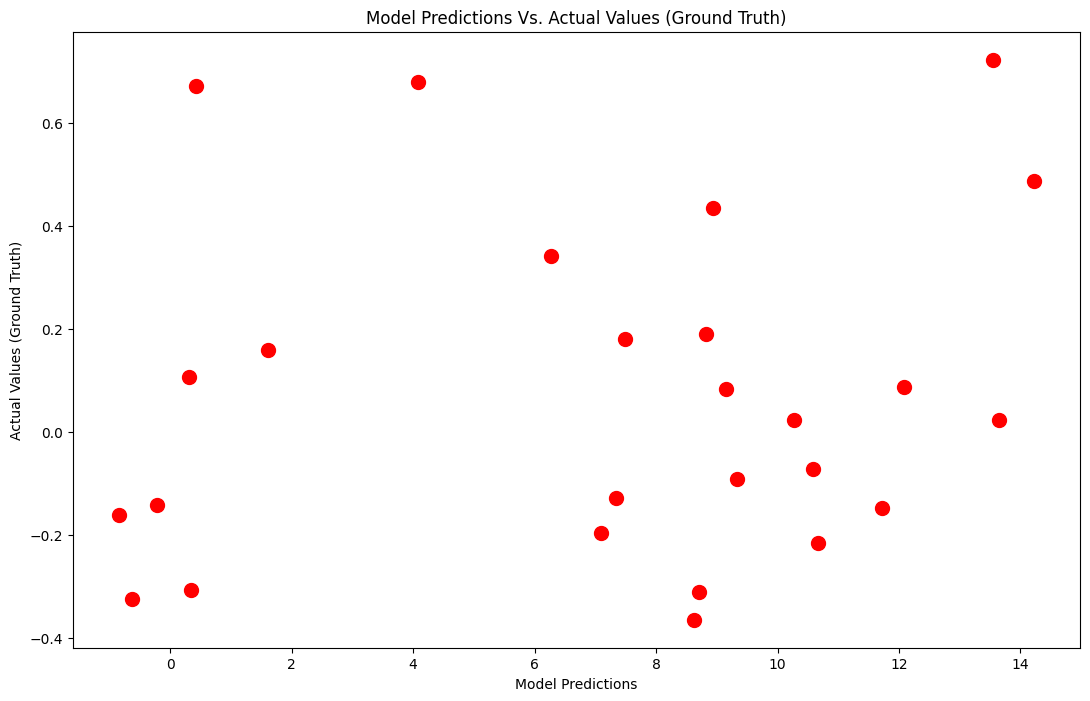

In [195]:
# Plot model predictions "y_predict" vs. actual outputs "y_test" (ground truth data)
plt.figure(figsize = (13, 8))
plt.plot(y_predict, y_test, 'o', color = 'r', markersize = 10)
plt.xlabel('Model Predictions')
plt.ylabel('Actual Values (Ground Truth)')
plt.title('Model Predictions Vs. Actual Values (Ground Truth)');

In [ ]:
# Display the trained model Y-intercept
print(linear_regression_model.intercept_)

# Display the estimated coefficients for the linear regression problem
print(linear_regression_model.coef_)

# TRAIN AND EVALUATE A RANDOM FOREST ALGORITHM

In [197]:
# Import Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regression model
# n_estimators: represents the number of trees in the forest
# max_depth: represents the maximum depth of the tree
random_forest_model = RandomForestRegressor(n_estimators = 5, max_depth = 10);
random_forest_model.fit(X_train, y_train);

In [198]:
# Evaluate trained Random Forest Regression model
y_predict = random_forest_model.predict(X_test)

In [199]:
# Let's generate various regression metrics by comparing "y_predict" vs. actual outputs "y_test" (ground truth data)
RMSE = float(np.sqrt(mean_squared_error(y_test, y_predict)))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)

print('Root Mean Squared Error (RMSE) =', RMSE, '\nMean Squared Error (MSE) =', MSE, '\nMean Absolute Error (MAE) =', MAE) 

Root Mean Squared Error (RMSE) = 0.19476042890288903 
Mean Squared Error (MSE) = 0.03793162466643729 
Mean Absolute Error (MAE) = 0.13166061731538461


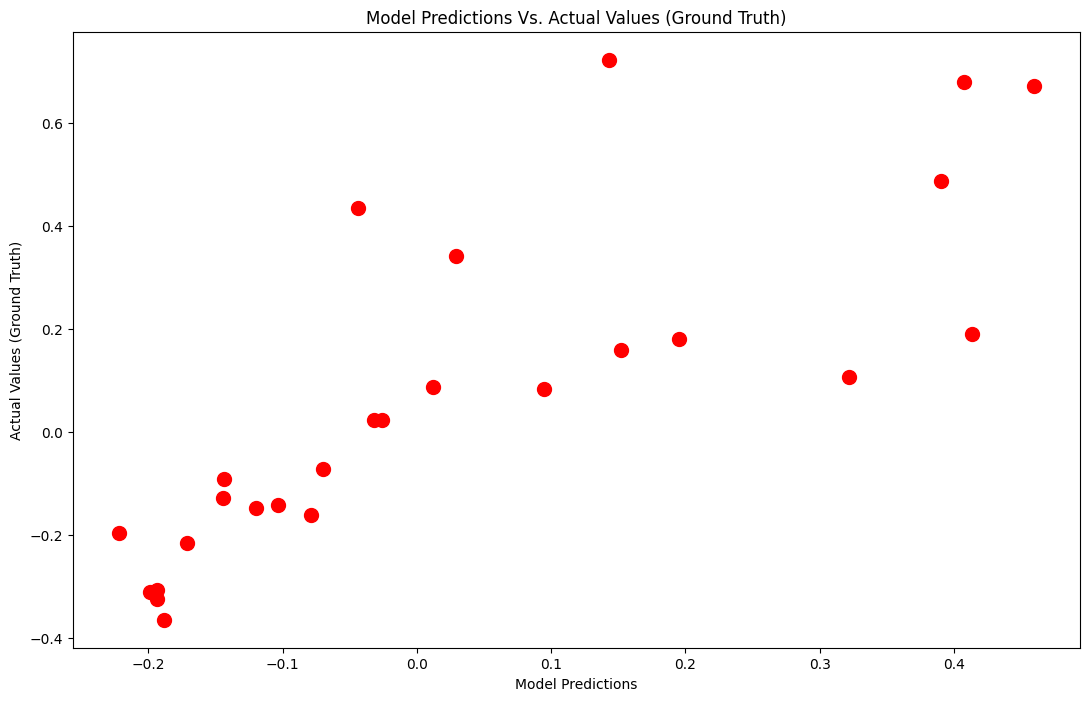

In [200]:
# Plot model predictions "y_predict" vs. actual outputs "y_test" (ground truth data)
plt.figure(figsize = (13, 8))
plt.plot(y_predict, y_test, 'o', color = 'r', markersize = 10)
plt.xlabel('Model Predictions')
plt.ylabel('Actual Values (Ground Truth)')
plt.title('Model Predictions Vs. Actual Values (Ground Truth)');

# TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK TO SOLVE REGRESSION PROBLEMS

In [201]:
# Let's train an Artificial Neural Network to solve regression type problems using Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras

In [202]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler();
scaler.fit(X_train);

In [203]:
# Apply data scaling to the training and testing datasets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [204]:
# Let's view the scaled training set
X_train_scaled 

array([[0.37677681, 0.2310089 , 0.3974203 , ..., 0.3208022 , 0.55869758,
        0.65712285],
       [0.35035346, 0.27917035, 0.4107223 , ..., 0.60365102, 0.48825674,
        0.66435815],
       [0.3377928 , 0.24415305, 0.32423597, ..., 0.46693079, 0.60213421,
        0.61314436],
       ...,
       [0.78283308, 0.49647215, 0.07621518, ..., 0.46362555, 0.61616072,
        0.71895241],
       [0.88145917, 0.47161082, 0.16268087, ..., 0.49781105, 0.57763448,
        0.71168249],
       [0.94707547, 0.8058915 , 0.23490141, ..., 0.60255831, 0.63546921,
        0.70174031]])

In [205]:
# Let's perform output data scaling 
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(y_train))

# Apply data scaling to the training and testing datasets
y_train_scaled = scaler.transform(pd.DataFrame(y_train))
y_test_scaled = scaler.transform(pd.DataFrame(y_test))

In [206]:
# Size of the input dataset
X_train.shape[1]

71

In [207]:
# Let's build our ANN using Keras API 
# Keras sequential model allows for building ANNs which consist of sequential layers (input, hidden..etc.)
# Dense means each neuron in the layer is fully connected to all the neurons in the previous layer  
# Normalization layer normalizes its inputs by applies a transformation to maintain the mean output close to 0 
# and standard deviation close to 1.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization, Dropout

ANN_model = Sequential()
ANN_model.add(Normalization(input_shape = [X_train.shape[1],], axis = None))
ANN_model.add(Dense(1024, activation = 'relu'))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(512, activation = 'relu'))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(256, activation = 'sigmoid'))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(32, activation = 'sigmoid'))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(units = 1, activation = 'linear'))

In [208]:
# Let's obtain the model summary
ANN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normaliza  (None, 71)                3         
 tion)                                                           
                                                                 
 dense_10 (Dense)            (None, 1024)              73728     
                                                                 
 dropout_8 (Dropout)         (None, 1024)              0         
                                                                 
 dense_11 (Dense)            (None, 512)               524800    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               131328    
                                                      

In [ ]:
# Let's compile the model
# Adam optimizer is the extended version of stochastic gradient descent algorithm 
# It works well in deep learning applications and ANNs training 
ANN_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001), loss = 'mean_squared_error')

# Let's fit the model using 500 epochs
history = ANN_model.fit(X_train_scaled, y_train_scaled, epochs = 500)

In [210]:
# Let's generate model predictions using the testing dataset and then scale the data back to its original range values
y_predict_scaled = ANN_model.predict(X_test_scaled)
y_predict = scaler.inverse_transform(y_predict_scaled)
y_test = scaler.inverse_transform(y_test_scaled)

1/1 [==============================] - 0s 81ms/step


In [211]:
# Let's generate various regression metrics by comparing "y_predict" vs. actual outputs "y_test" (ground truth data)
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np 

RMSE = float(np.sqrt(mean_squared_error(y_test, y_predict)))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)

print('Root Mean Squared Error (RMSE) =', RMSE, '\nMean Squared Error (MSE) =', MSE, '\nMean Absolute Error (MAE) =', MAE) 

Root Mean Squared Error (RMSE) = 0.32945543663395754 
Mean Squared Error (MSE) = 0.10854088472767162 
Mean Absolute Error (MAE) = 0.28630703794873785


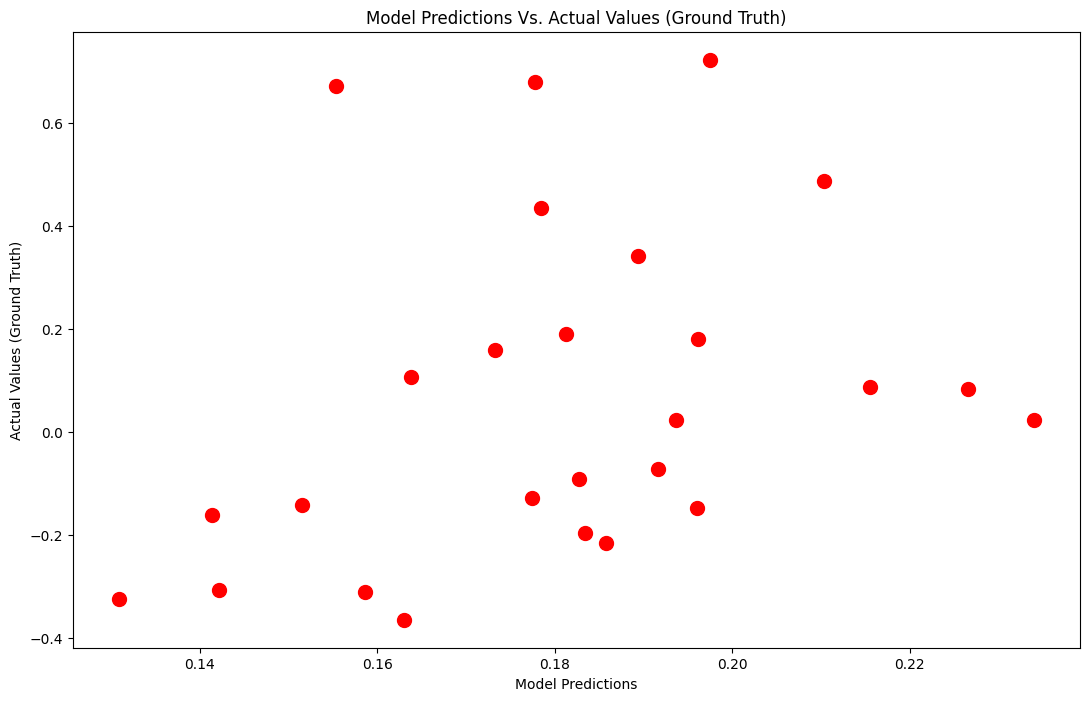

In [212]:
# Plot model predictions "y_predict" vs. actual outputs "y_test" (ground truth data)
plt.figure(figsize = (13, 8))
plt.plot(y_predict, y_test, 'o', color = 'r', markersize = 10)
plt.xlabel('Model Predictions')
plt.ylabel('Actual Values (Ground Truth)')
plt.title('Model Predictions Vs. Actual Values (Ground Truth)');

# TRAIN AND EVALUATE AN XGBOOST MODEL

In [213]:
# Import XGBoost
import xgboost as xgb

In [214]:
# Train an XGBoost regressor model 
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', 
                             learning_rate = 0.1, 
                             max_depth = 3, 
                             n_estimators = 200);
xgb_model.fit(X_train, y_train);

In [215]:
# Make predictions on the test data
y_predict = xgb_model.predict(X_test)
y_predict

array([-0.11959615,  0.28623122,  0.46782362, -0.2714757 , -0.16786681,
        0.12801982,  0.44903708, -0.21418668, -0.14889543,  0.05870688,
        0.09805629, -0.15959722, -0.11683004,  0.28056586,  0.13554478,
       -0.15631516, -0.10164441,  0.06442071,  0.01954242, -0.19307323,
       -0.09878985, -0.01400111,  0.36721382, -0.1349485 , -0.1032506 ,
        0.13609514], dtype=float32)

In [216]:
# Let's generate various regression metrics by comparing "y_predict" vs. actual outputs "y_test" (ground truth data)
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np 

RMSE = float(np.sqrt(mean_squared_error(y_test, y_predict)))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)

print('Root Mean Squared Error (RMSE) =', RMSE, '\nMean Squared Error (MSE) =', MSE, '\nMean Absolute Error (MAE) =', MAE) 

Root Mean Squared Error (RMSE) = 0.1879870798187391 
Mean Squared Error (MSE) = 0.03533914217877698 
Mean Absolute Error (MAE) = 0.1241670998350246


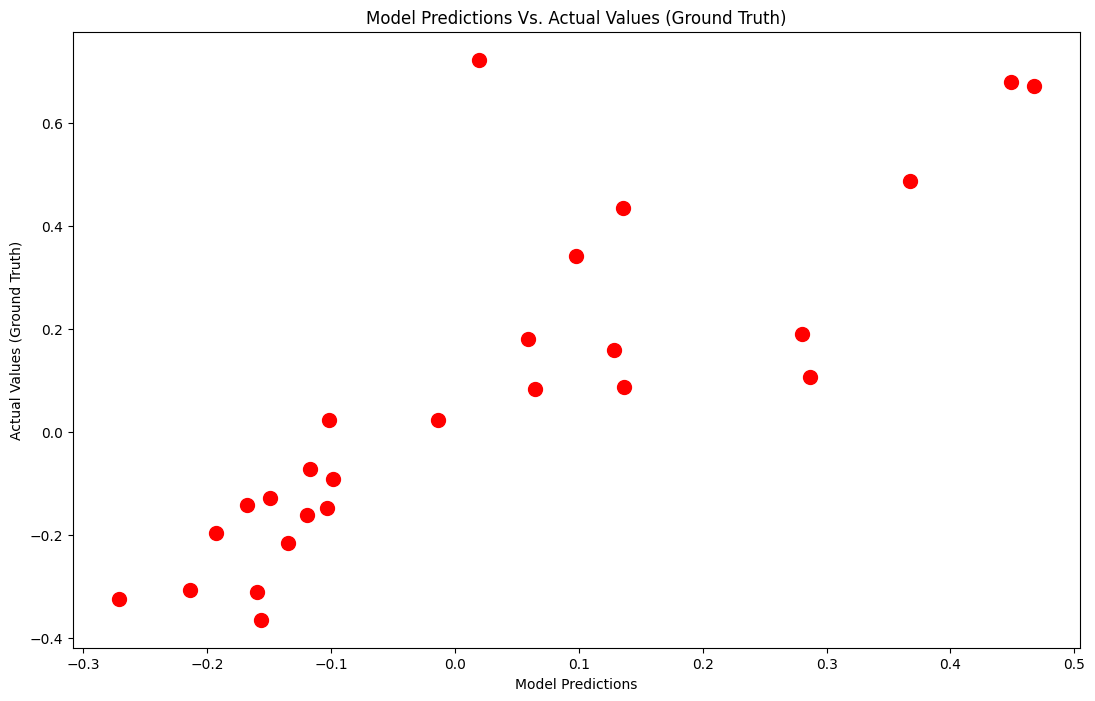

In [217]:
# Plot model predictions "y_predict" vs. actual outputs "y_test" (ground truth data)
plt.figure(figsize = (13, 8))
plt.plot(y_predict, y_test, 'o', color = 'r', markersize = 10)
plt.xlabel('Model Predictions')
plt.ylabel('Actual Values (Ground Truth)')
plt.title('Model Predictions Vs. Actual Values (Ground Truth)');

# PERFORM HYPERPARAMETERS OPTIMIZATION

In [218]:
# GridSearchCV performs exhaustive search over a specified list of parameters
# You provide the algorithm with the hyperparameters and values you would like to experiment with 
# Note that you will have the following number of combinations: 4 * 4 * 4 * 3 = 192
# We will run each combination 5 times since we set the cross validation = 5
# Total number of runs = 192 * 5 = 960 fits

from sklearn.model_selection import GridSearchCV

In [219]:
# Specify the parameters grid
parameters_grid = {'max_depth': [1, 3, 5, 10],
                   'learning_rate': [0.01, 0.1, 0.5, 1],
                   'n_estimators': [10, 50, 100, 200],
                   'subsample': [0.5, 0.75, 1.0]} 

In [220]:
# Note that "neg_mean_squared_error" is used for scoring since our goal is to minimize the error
# GridSearchCV() ranks all algorithms (estimators) and specifies which one is the best
# cv stands for the number of cross-validation folds which is set to 5 by default
# Verbose controls the verbosity: the higher the number, the more messages to be displayed

xgb_gridsearch = GridSearchCV(estimator = xgb.XGBRegressor(objective = 'reg:squarederror'), 
                              param_grid = parameters_grid, 
                              scoring = 'neg_mean_squared_error',  
                              cv = 5, 
                              verbose = 5)

In [ ]:
# Let's fit the model
xgb_gridsearch.fit(X_train, y_train)

In [222]:
# Indicate best parameters after grid search optimization
xgb_gridsearch.best_params_

{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 10, 'subsample': 0.75}

In [223]:
# Display the best estimator values
xgb_gridsearch.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [224]:
# Generate predictions based on the optimal model parameters
y_predict = xgb_gridsearch.predict(X_test)
y_predict

array([ 0.09185036,  0.18636253,  0.53361934, -0.18179065, -0.0144498 ,
        0.23415202,  0.6582728 , -0.12778832, -0.05685587,  0.14682347,
        0.22108953, -0.21571946, -0.04045269,  0.40854517,  0.3548993 ,
       -0.1795797 , -0.03275229,  0.07325889,  0.33698377, -0.26001325,
       -0.16721447, -0.02615298,  0.25647116, -0.20614327, -0.08356509,
        0.06119853], dtype=float32)

In [225]:
# Let's generate various regression metrics by comparing "y_predict" vs. actual outputs "y_test" (ground truth data)
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np 

RMSE = float(np.sqrt(mean_squared_error(y_test, y_predict)))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)

print('Root Mean Squared Error (RMSE) =', RMSE, '\nMean Squared Error (MSE) =', MSE, '\nMean Absolute Error (MAE) =', MAE) 

Root Mean Squared Error (RMSE) = 0.13958975783535596 
Mean Squared Error (MSE) = 0.019485300492533324 
Mean Absolute Error (MAE) = 0.10873614415953277


Text(0.5, 1.0, 'Model Predictions Vs. Actual Values (Ground Truth)')

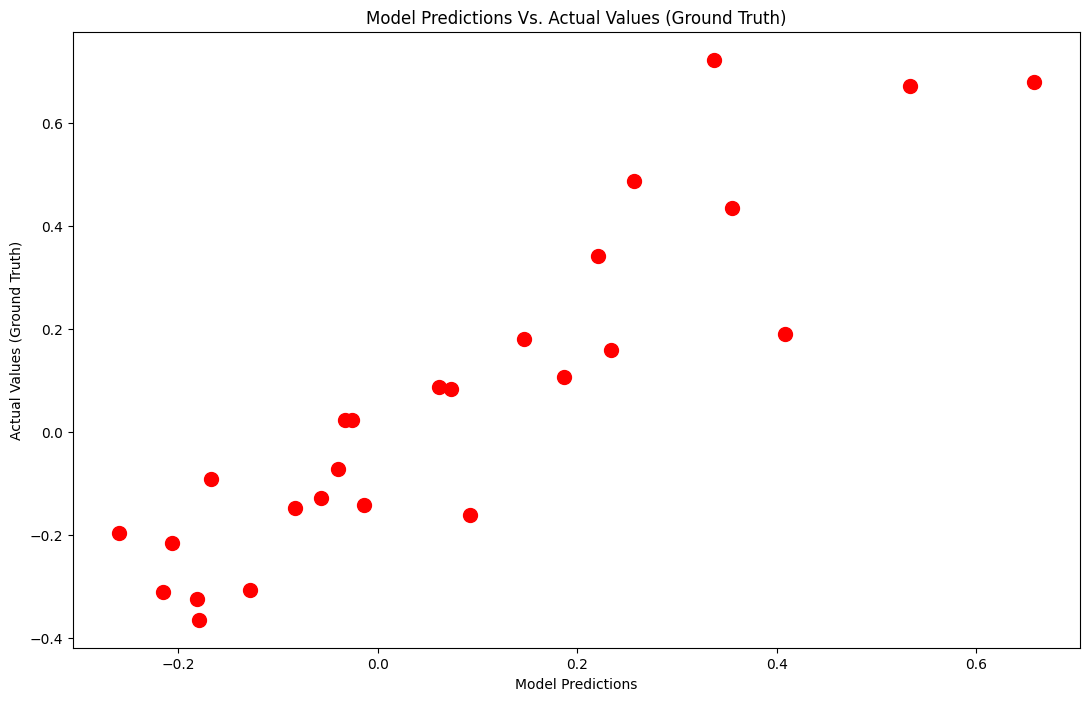

In [226]:
# Plot model predictions "y_predict" vs. actual outputs "y_test" (ground truth data)
plt.figure(figsize = (13, 8))
plt.plot(y_predict, y_test, 'o', color = 'r', markersize = 10)
plt.xlabel('Model Predictions')
plt.ylabel('Actual Values (Ground Truth)')
plt.title('Model Predictions Vs. Actual Values (Ground Truth)')